# Decision Tree 

### Load the dataset

In [1]:
import pandas as pd
data = pd.read_csv("recharge_data.csv")
data.head(10)

,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,Postpaid,Yes,Yes
1,1151,Basic,No,Yes
2,1584,Basic,Yes,Yes
3,2693,Postpaid,No,Yes
4,500,Postpaid,Yes,No
5,2837,Postpaid,No,Yes
6,727,Unlimited,Yes,No
7,1815,Unlimited,Yes,Yes
8,1135,Premium,Yes,No
9,1226,Basic,Yes,Yes


### Inspect the dataset

In [2]:
print('Columns:', data.columns.tolist())

print('\nDataset Size:')
print(data.shape)

print('\nDataset Info:')
print(data.info())

print('\nDataset Completeness:')
print(data.isnull().sum())

print('\nDataset Consistency:')
print(data.dtypes)

print('\nStatistics:')
print(data.describe())

Columns: ['MonthlyUsage', 'CustomerType', 'Complaints', 'Recharged']

Dataset Size:
(150, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MonthlyUsage  150 non-null    int64 
 1   CustomerType  150 non-null    object
 2   Complaints    150 non-null    object
 3   Recharged     150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
None

Dataset Completeness:
MonthlyUsage    0
CustomerType    0
Complaints      0
Recharged       0
dtype: int64

Dataset Consistency:
MonthlyUsage     int64
CustomerType    object
Complaints      object
Recharged       object
dtype: object

Statistics:
       MonthlyUsage
count      150.0000
mean      1448.6400
std        825.4999
min        135.0000
25%        801.7500
50%       1368.5000
75%       1884.7500
max       2995.0000


## 33.4.2  Dataset Specification Sheet

| **Field**           | **Details** |
|---------------------|-------------|
| **Dataset Name**    | `recharge_data.csv` (demo dataset) |
| **Description**     | Contains customer behavior data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features**        | `MonthlyUsage`,`CustomerType`,`Complaints` |
| **Target Variable** | *Recharged*(Yes=Recharged) |
| **Number of Rows**  | 150 |
| **Null Handling**   | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `categorical data`; datatype validation performed; value distribution and proportion analysis conducted for `MonthlyUsage`,`CustomerType`,`Complaints` |
| **Owner**           | Vedashree|
| **Last Updated**    | 2026-02-13 |

### Bias check

In [3]:
print(data['CustomerType'].value_counts(normalize = True))
print(data['Recharged'].value_counts(normalize = True))

CustomerType
Premium      0.273333
Unlimited    0.220000
Postpaid     0.213333
Prepaid      0.160000
Basic        0.133333
Name: proportion, dtype: float64
Recharged
Yes    0.7
No     0.3
Name: proportion, dtype: float64


<Axes: >

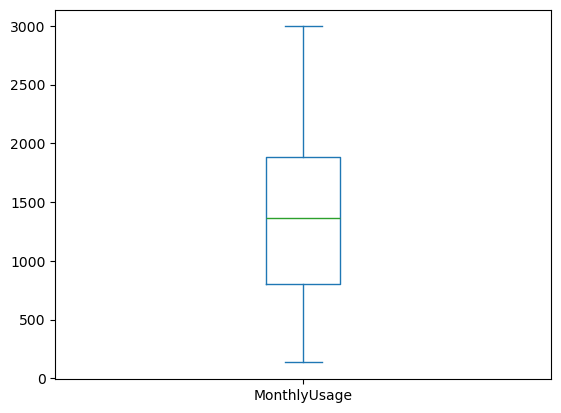

In [4]:
data['MonthlyUsage'].plot(kind = 'box')

### Preprocessing

In [5]:
# Separating categorical and numerical features.
categorical = data.select_dtypes(include = 'object').columns
numerical = data.select_dtypes(exclude = 'object').columns

print("Categorical columns: ", list(categorical))
print("Numerical columns: ", list(numerical))

Categorical columns:  ['CustomerType', 'Complaints', 'Recharged']
Numerical columns:  ['MonthlyUsage']


### Encoding 

In [6]:
# Encoding the categorical data using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CustomerType'] = le.fit_transform(data['CustomerType'])
data['Complaints'] = le.fit_transform(data['Complaints'])
data['Recharged'] = le.fit_transform(data['Recharged'])  

x = data[['MonthlyUsage', 'CustomerType', 'Complaints']]
y = data['Recharged']
data

,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,1,1,1
1,1151,0,0,1
2,1584,0,1,1
3,2693,1,0,1
4,500,1,1,0
...,...,...,...,...
145,1343,2,1,1
146,1540,2,0,1
147,497,4,1,0
148,1283,0,1,1


### Train-Test Split 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Model training

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion = "gini",  # Measures the quality of a splut
    max_depth = 6,       # Limits treee growth to prevent overfitting 
    min_samples_split = 5, # Minimum samples required to split an internal node
    min_samples_leaf = 2   # Minimum samples required at a leaf node
)
# Train the model
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Prediction 

In [9]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred)) 

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[13  0]
 [ 1 31]]


### Visualize the Decision Tree

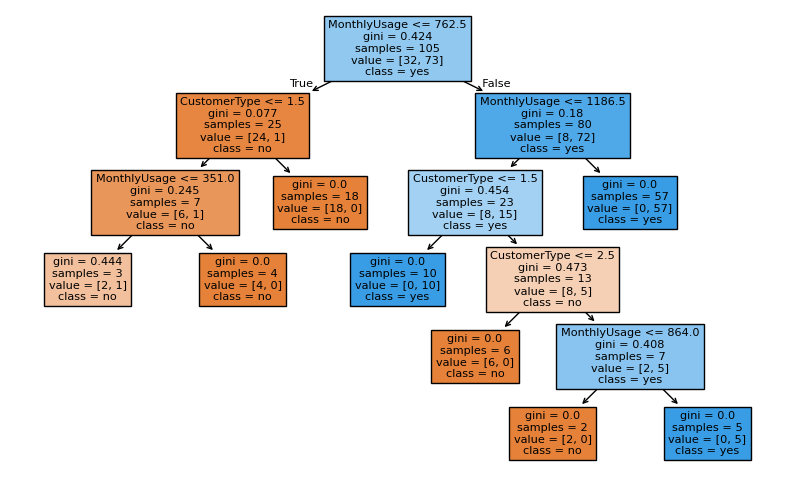

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plot_tree(model, feature_names =['MonthlyUsage','CustomerType','Complaints'], class_names = ['no','yes'], filled = True)
plt.show()

### User Input Prediction

In [11]:
new_data = [[1130,2,3]]
print('Recharge Prediction:', model.predict(new_data))

Recharge Prediction: [0]


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
